2021-06-28 다변수확률변수, 결합.주변.조건부확률분포, 확률변수 독립

In [2]:
# 예제 
grades = ['A','B','C','D','E','F']
scores = pd.DataFrame(
    [[1,2,1,0,0,0],
    [0,2,3,1,0,0],
    [0,4,7,4,1,0],
    [0,1,4,5,4,0],
    [0,0,1,3,2,0],
    [0,0,0,1,2,1]], columns=grades, index=grades
)
scores.index.name='Y'
scores.columns.name='X'
print('벡터의 히스토그램')
scores

벡터의 히스토그램


X,A,B,C,D,E,F
Y,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [3]:
# 결합확률질량함수 = 벡터의 확률질량함수
pmf = scores/scores.values.sum()
print('결합확률질량함수')
pmf

결합확률질량함수


X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


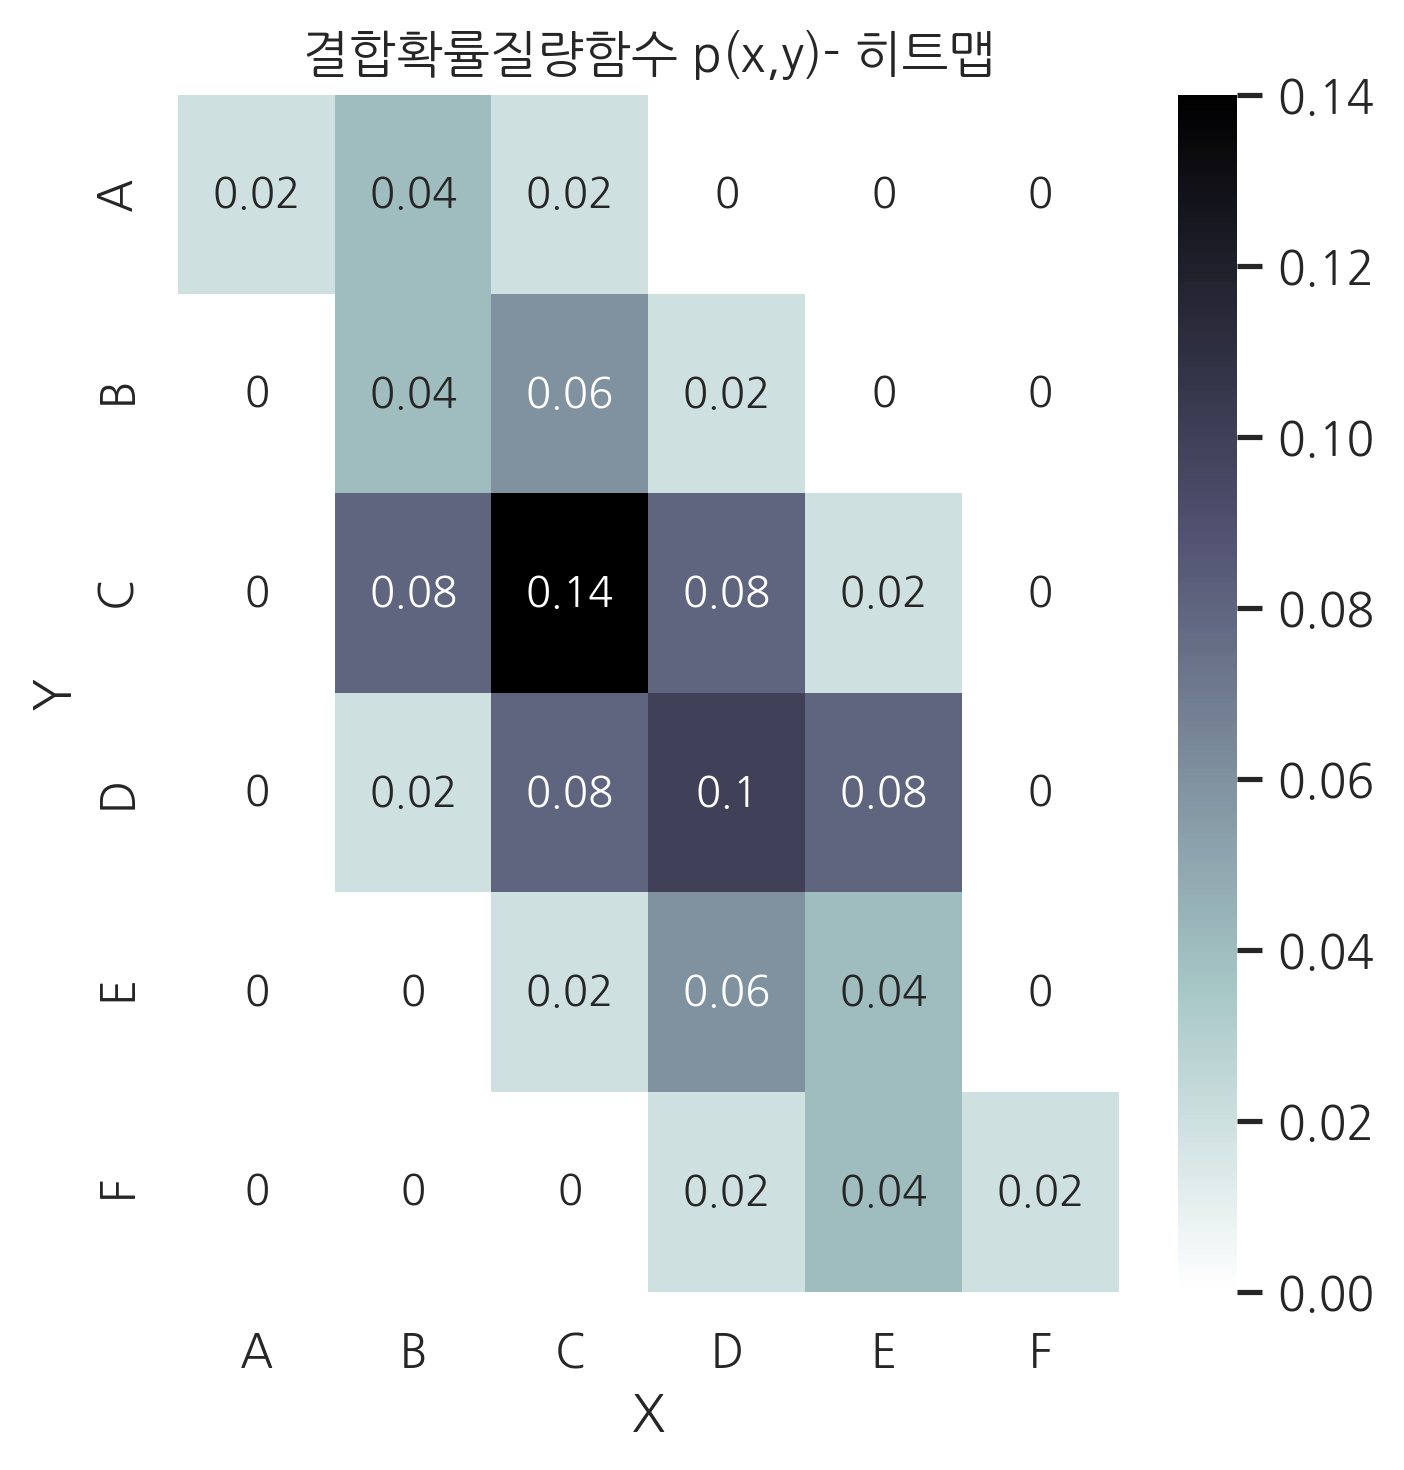

In [10]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True, xticklabels=grades,yticklabels=grades)
plt.title('결합확률질량함수 p(x,y)- 히트맵')
plt.tight_layout()
plt.show()

In [13]:
# 결합확률질량함수로 부터 구한 주변확률질량함수
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [14]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y

Y
A    0.08
B    0.12
C    0.32
D    0.28
E    0.12
F    0.08
dtype: float64

In [15]:
# 결합확률질량함수의 단면
pmf.iloc[0,:]

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [16]:
# 조건이 되는 확률변수의 주변 확률질량함숫값
print(np.sum(pmf.iloc[0,:]))

0.08


In [21]:
# 조건부확률질량함수 = > 결합확률질량함수 단면 / 조건이 되는 확률변수의 주변확률질량함숫값
cond_y0 = pmf.iloc[0,:]/pmf_marginal_y[0]
print('조건부확률질량함숫값 : \n {}'.format(cond_y0))

조건부확률질량함숫값 : 
 X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64


In [22]:
np.sum(cond_y0) # 조건부확률질량함숫값 합은 1 되어야 한다. 

1.0

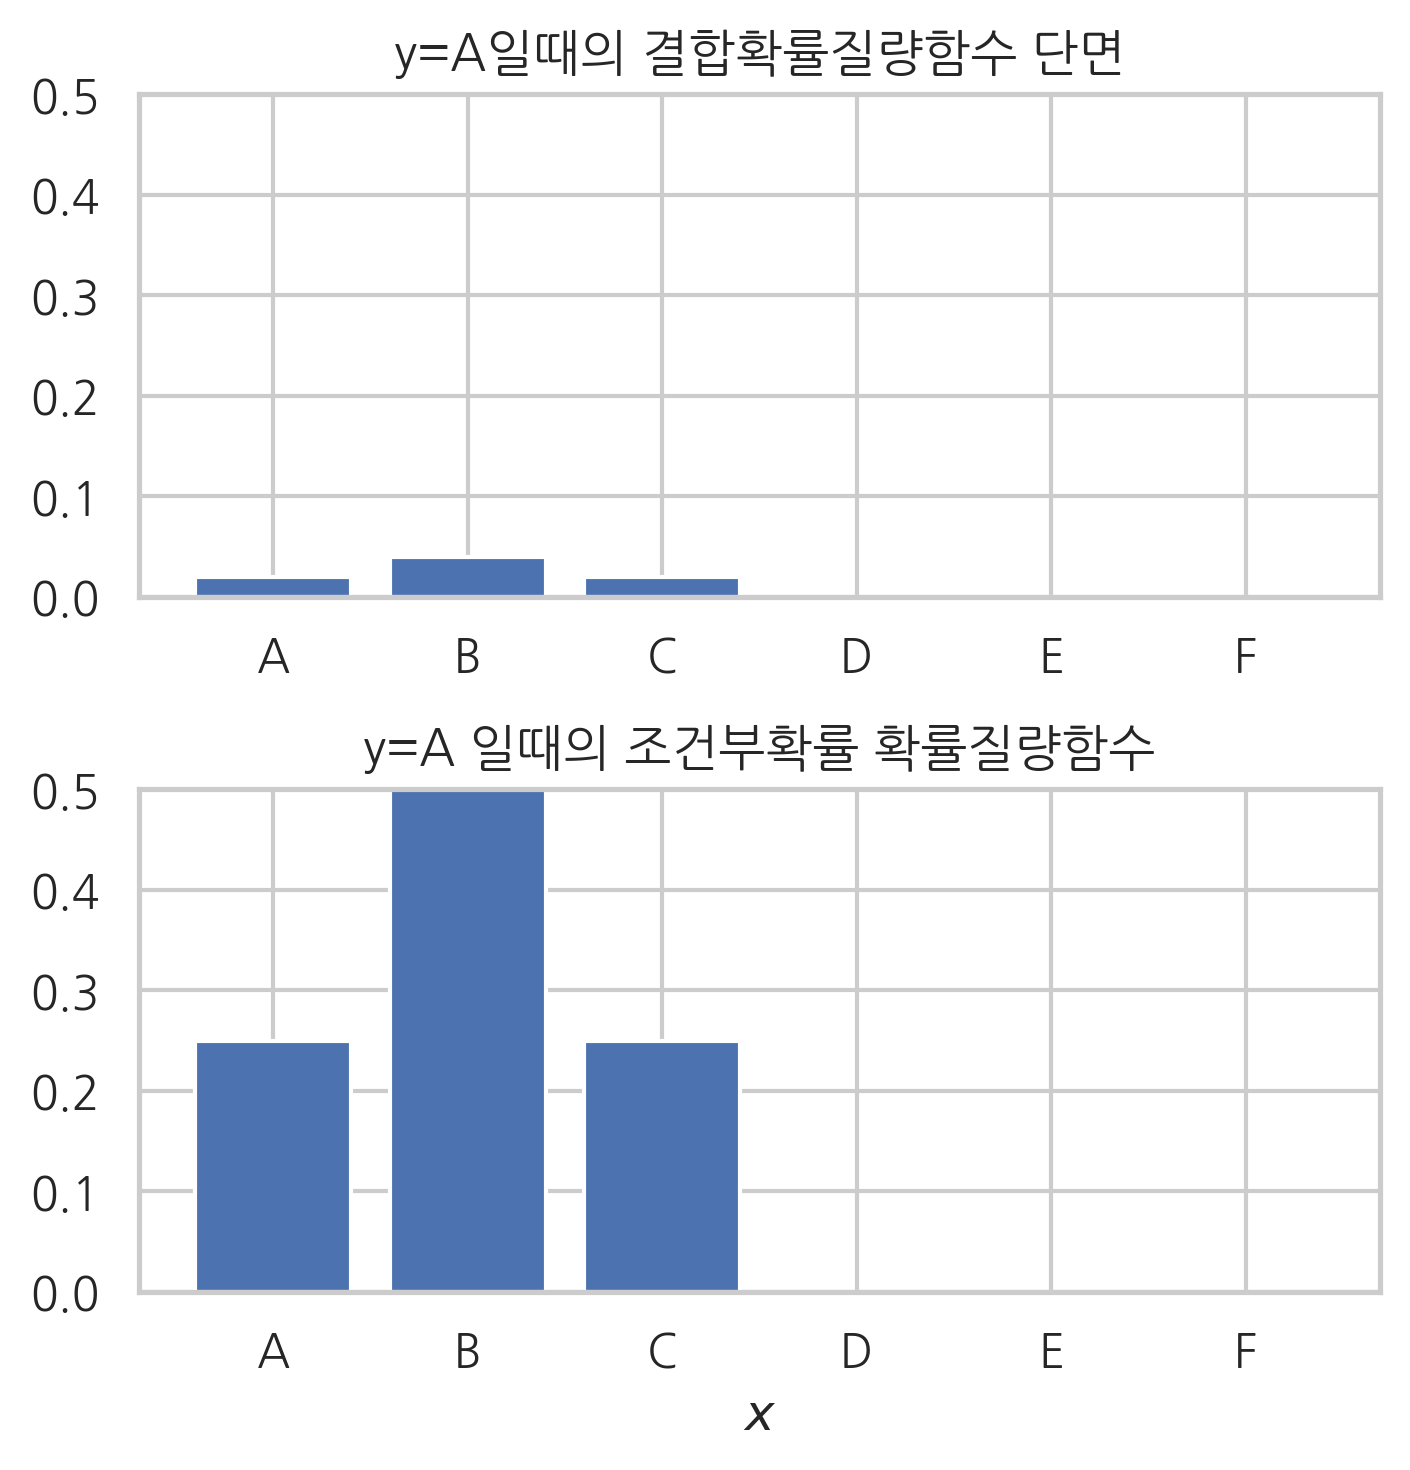

In [38]:
plt.subplot(211)
plt.bar(np.arange(6), pmf.iloc[0,:])
plt.ylim(0,0.5)
plt.xticks(range(6), grades)
plt.title('y=A일때의 결합확률질량함수 단면')

plt.subplot(212)
plt.bar(np.arange(6), cond_y0)
plt.ylim(0,0.5)
plt.xticks(range(6), grades)
plt.title('y=A 일때의 조건부확률 확률질량함수')
plt.xlabel('$x$')
plt.tight_layout()
plt.show()

In [39]:
# y=B 일때의 조건부확률질량함수값들 구해보자. 
pmf

X,A,B,C,D,E,F
Y,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [46]:
pmf.iloc[1,:] # 결합확률질량함수 자른 단면 
sums = np.sum(pmf.iloc[1,:]) # p_Y(y=B)

In [49]:
cond_y2 = pmf.iloc[1,:]/sums # 조건부확률질량함숫값
print(cond_y2)

X
A    0.000000
B    0.333333
C    0.500000
D    0.166667
E    0.000000
F    0.000000
Name: B, dtype: float64


In [50]:
np.sum(cond_y2)

0.9999999999999999

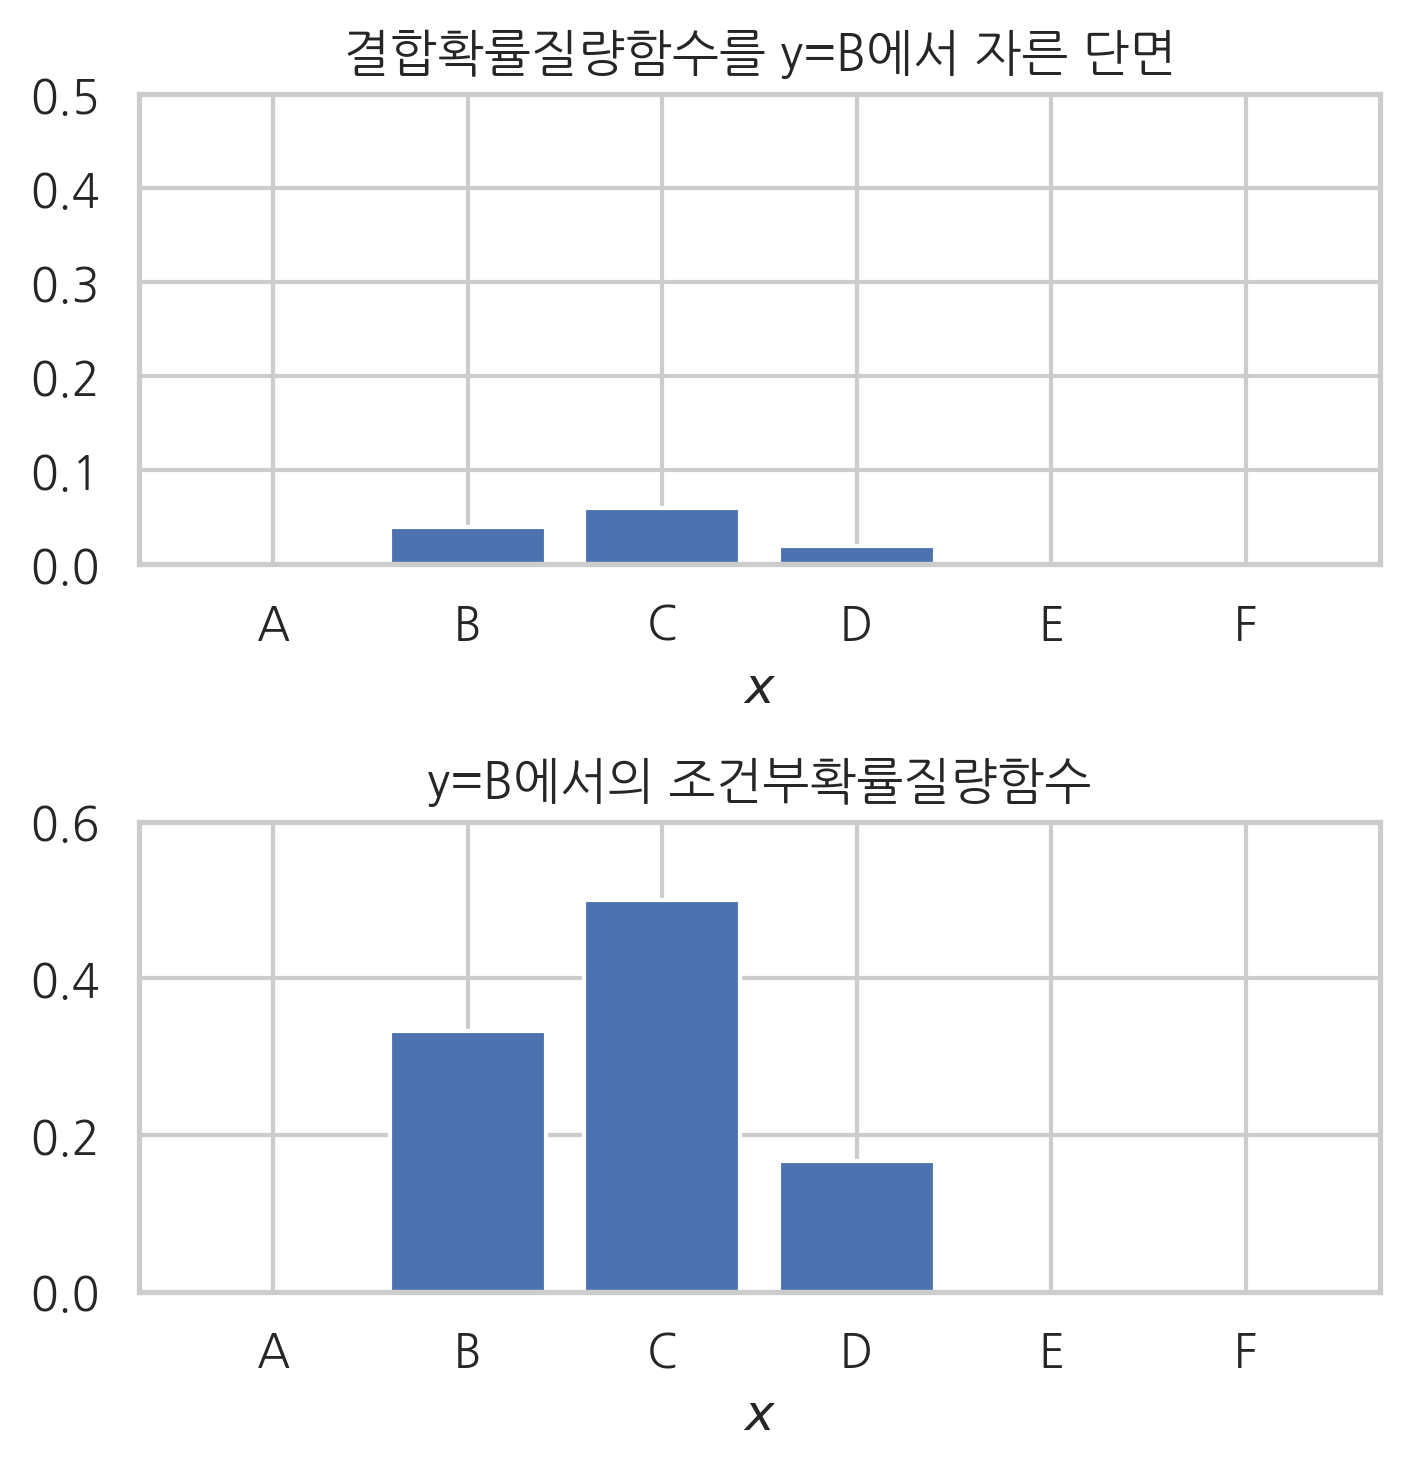

In [57]:
y = np.arange(6)
plt.subplot(211)
plt.bar(y, pmf.iloc[1,:])
plt.ylim(0,0.5)
plt.title('결합확률질량함수를 y=B에서 자른 단면')
plt.xlabel('$x$')
plt.xticks(range(6), grades)

plt.subplot(212)
plt.bar(y, cond_y2)
plt.ylim(0,0.6)
plt.xlabel('$x$')
plt.title('y=B에서의 조건부확률질량함수')
plt.xticks(range(6), grades)

plt.tight_layout()
plt.show()

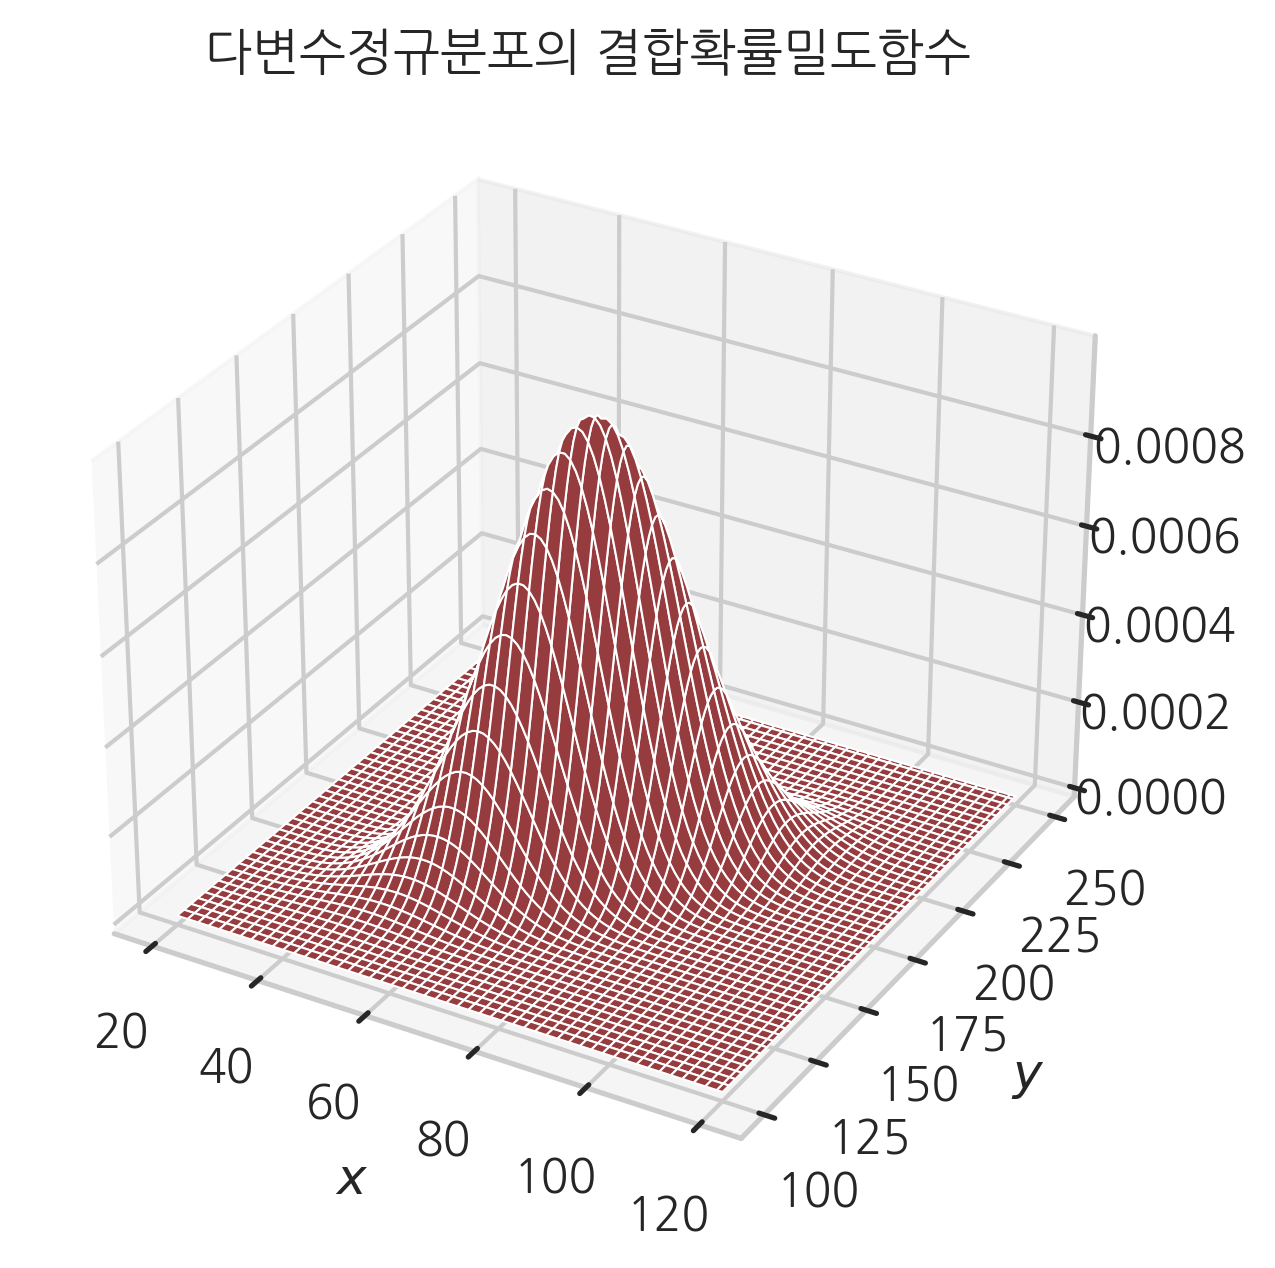

In [100]:
# 결합확률밀도함수 를 그려보자. 
# 다변수 정규분포 
mu = [70,170]
cov = [[150,140],[140,300]]

rv = sp.stats.multivariate_normal(mu, cov) # 다변수 정규분포 객체

xx = np.linspace(20,120,100)
yy = np.linspace(100,250,100)

X,Y = np.meshgrid(xx,yy) # 10,000개의 그리드포인트 
grid_point = np.dstack([X,Y]) # 좌표점 # 그리드포인트
Z = rv.pdf(grid_point)

ax = plt.gca(projection='3d')
ax.plot_surface(X,Y,Z, color='r',linewidth=0.5)
plt.title('다변수정규분포의 결합확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$y$')
#ax.view_init(80,100)
plt.show()

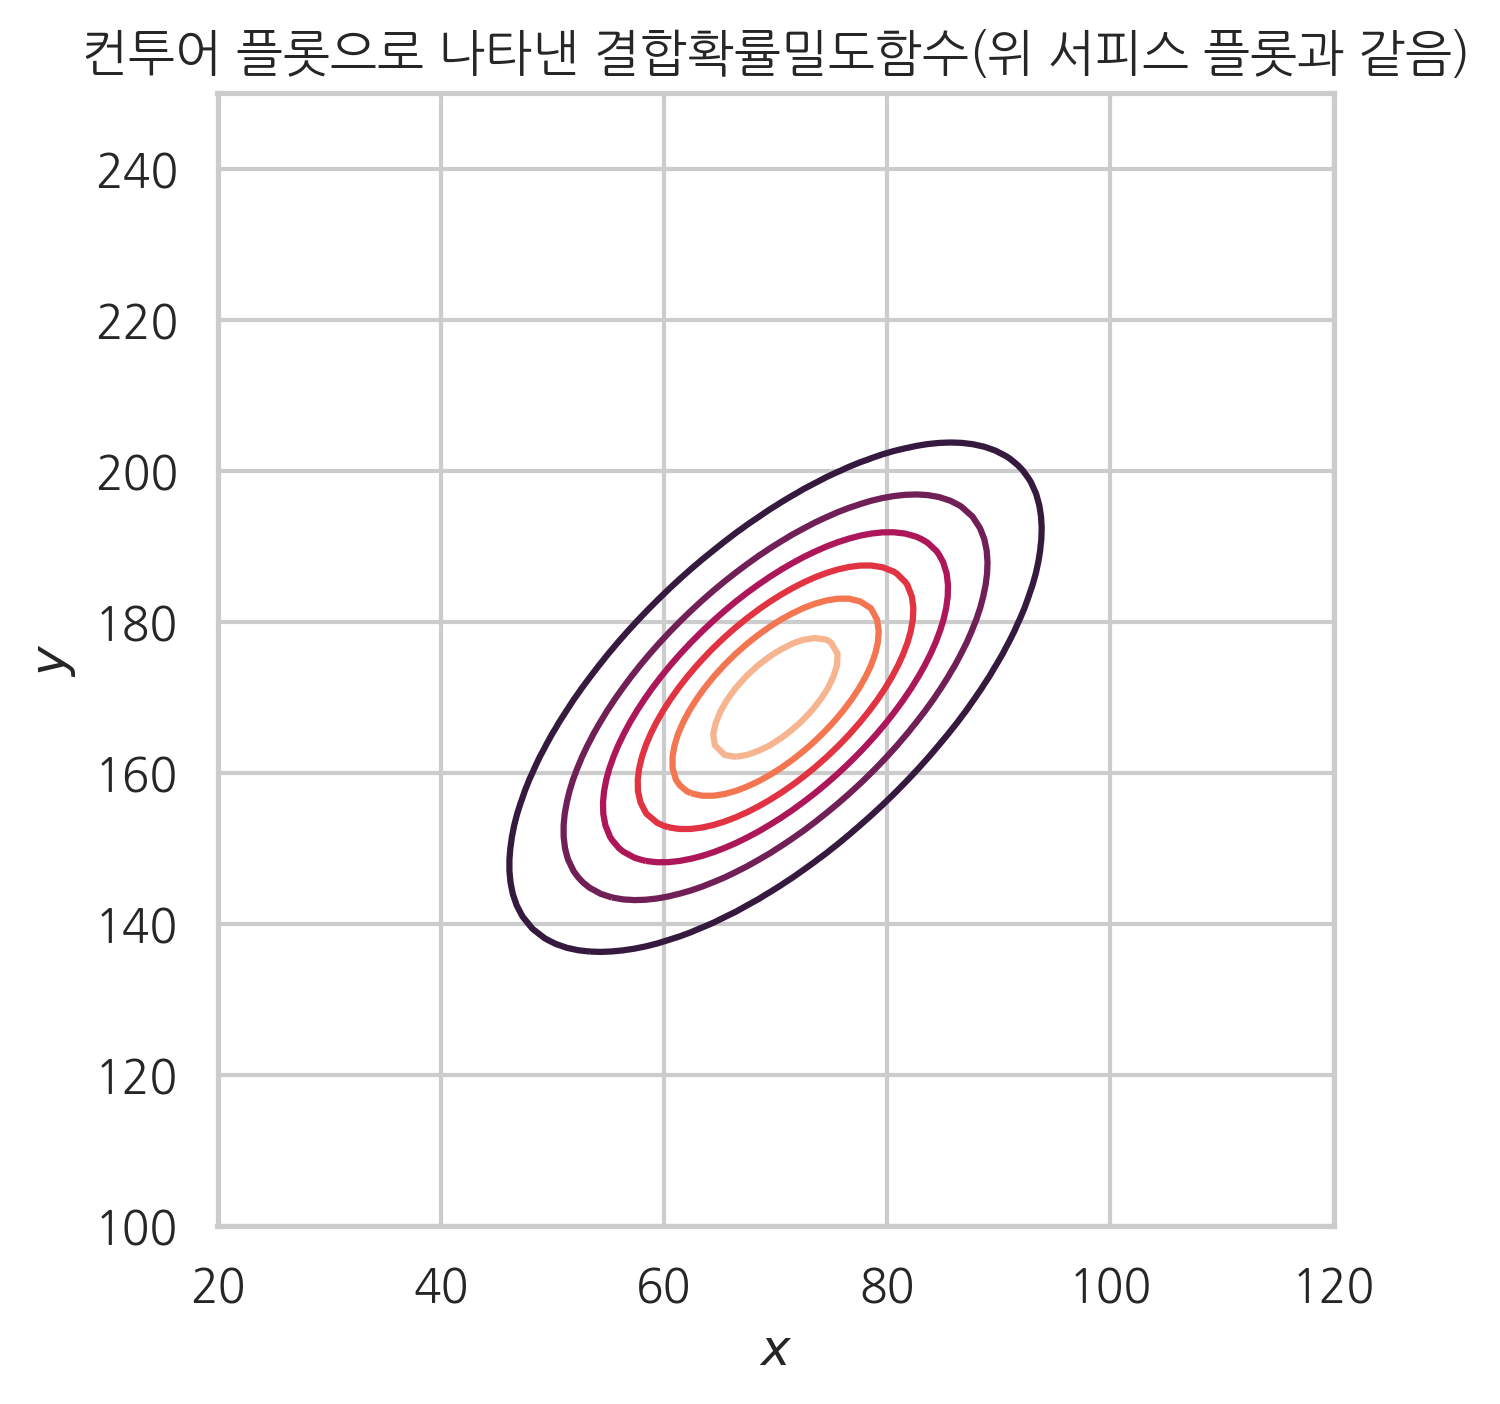

In [89]:
plt.contour(X,Y,Z)
plt.title('컨투어 플롯으로 나타낸 결합확률밀도함수(위 서피스 플롯과 같음)')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [111]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps

xx = np.linspace(20,120,100)
yy = np.linspace(100,250,100)
XX,YY = np.meshgrid(xx,yy)
ZZ = rv.pdf(np.dstack([XX,YY]))

fx = [simps(Z,yy) for Z in ZZ.T]
fy = [simps(Z,xx) for Z in ZZ]

plt.figure(figsize=(6,6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65


<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

In [119]:
# 확률변수가 서로 독립일 때 : 조건부 분포가 영향 안 받는다'를 확인해보자. 
pmf1 = np.array([
    [1,2,4,2,1],
    [2,4,8,4,2],
    [4,8,16,8,4],
    [2,4,8,4,2],
    [1,2,4,2,1]
])
pmf1

array([[ 1,  2,  4,  2,  1],
       [ 2,  4,  8,  4,  2],
       [ 4,  8, 16,  8,  4],
       [ 2,  4,  8,  4,  2],
       [ 1,  2,  4,  2,  1]])

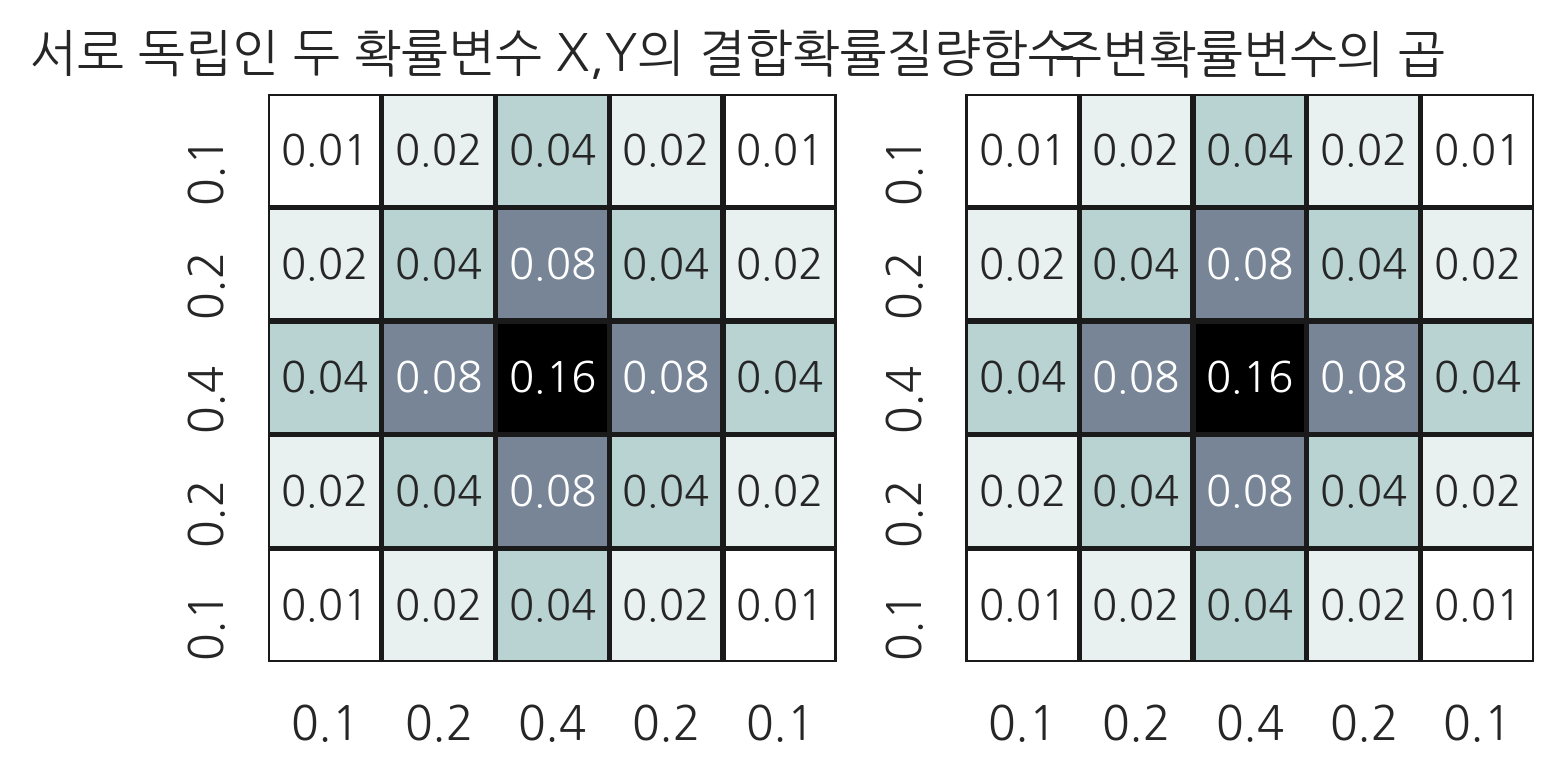

In [157]:
pmf1 = pmf1/pmf1.sum() # 결합확률질량분포

pmf1_marginal_x = np.round(pmf1.sum(axis=0),2) # x주변확률질량함수
pmf1_marginal_y = np.round(pmf1.sum(axis=1),2) # y주변확률질량함수
pmf1x = pmf1_marginal_x*pmf1_marginal_y[:,np.newaxis] # 서로 독립인 두 확률변수의 주변확률질량함수 곱

plt.subplot(121)
sns.heatmap(pmf1, cmap = mpl.cm.bone_r, annot = True, square=True,linewidth=1, linecolor='k',cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title('서로 독립인 두 확률변수 X,Y의 결합확률질량함수')

plt.subplot(122)
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k',cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title('주변확률변수의 곱')

plt.tight_layout()
plt.show()


In [162]:
# 조건부확률을 비교해보자. 독립이라면 [ 조건부확률값 = 주변확률값 ] 성립할 것이다. 
cond_x_y0 = pmf1[0,:]/pmf1_marginal_x[0]
cond_x_y0

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [161]:
cond_x_y1 = pmf1[1,:]/pmf1_marginal_y[1]
cond_x_y1

## 같다. 

array([0.1, 0.2, 0.4, 0.2, 0.1])

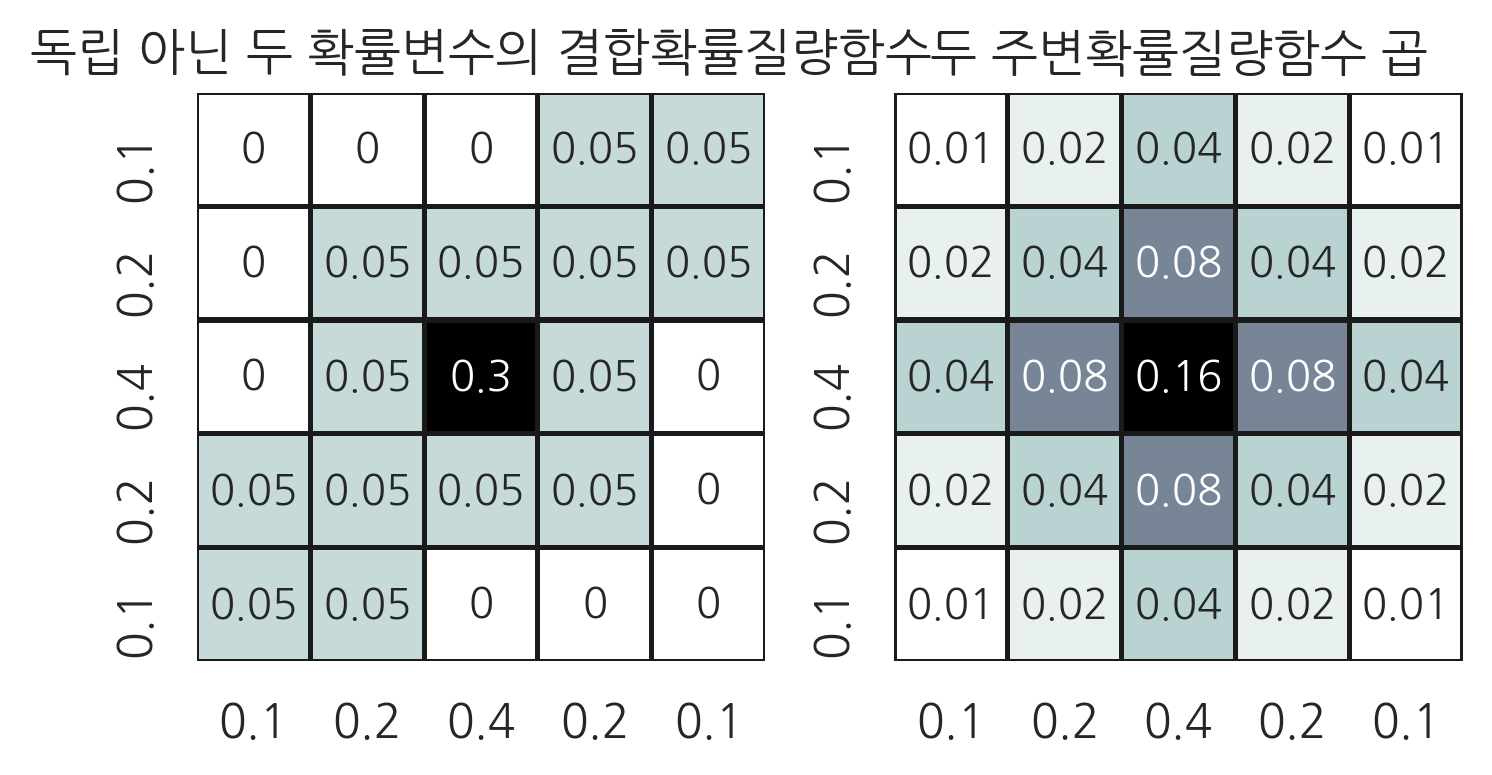

In [173]:
# 확률변수가 서로 독립이 아닌 케이스 
pmf2 = np.array([
    [0,0,0,5,5],
    [0,5,5,5,5],
    [0,5,30,5,0],
    [5,5,5,5,0],
    [5,5,0,0,0]
])

pmf2 = pmf2/np.sum(pmf2) # 결합확률질량함수

pmf2_marginal_x = np.round(pmf2.sum(axis=0),2) #x 주변확률질량함수
pmf2_marginal_y = np.round(pmf2.sum(axis=1),2) #y 주변확률질량함수 
pmf2x = pmf2_marginal_x*pmf2_marginal_y[:,np.newaxis] # 주변확률질량함수 곱

plt.subplot(121)
sns.heatmap(pmf2, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k',cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title('독립 아닌 두 확률변수의 결합확률질량함수')

plt.subplot(122)
sns.heatmap(pmf2x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k',cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title('두 주변확률질량함수 곱')

plt.tight_layout()
plt.show()


In [178]:
cond_x_y0 = pmf2[0,:]/pmf2_marginal_y[0]
cond_x_y0

array([0. , 0. , 0. , 0.5, 0.5])

In [179]:
cond_x_y1 = pmf2[1,:]/pmf2_marginal_y[1]
cond_x_y1

# y값에 따라 조건부확률값도 달라진다!

array([0.  , 0.25, 0.25, 0.25, 0.25])